PROBLEM STATMENT:-
Using machine learning concepts, need to predict the weather condition.The weather condition may be drizzle,rain,sun,snow,fog.
This weather condition are decided by year and month.

Description:-
The Weather Dataset is a information about the weather condition of Month. It records precipitation, maximum temperature, miniimum temperature, Wind speed.
This Dataset available as a csv file. We are going to analyze this dataset using Panda's data frame.


About Dataset:-
Using the Columns :
* precipitation
* tempmax 
* tempmin
* wind


OBJECTIVE:-
We are going to predict the weather condition :
* drizzle
* rain
* sun
* snow
* fog

In [ ]:
Importing the Essential Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [ ]:
Loading the Data using CSV file

In [ ]:
df= pd.read_csv("C:\\Users\\HP\\Downloads\\weather.csv")
print(df)

In [2]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain


In [3]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,12/27/2015,8.6,4.4,1.7,2.9,rain
1457,12/28/2015,1.5,5.0,1.7,1.3,rain
1458,12/29/2015,0.0,7.2,0.6,2.6,fog
1459,12/30/2015,0.0,5.6,-1.0,3.4,sun
1460,12/31/2015,0.0,5.6,-2.1,3.5,sun


In [ ]:
info():
The information contains the number of columns, column labels, column data types, memory usage, range index,
and the number of cells in each column (non-null values).

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [5]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [6]:
#count - The number of not-empty values.
#mean - The average (mean) value.
#std - The standard deviation.
#min - the minimum value.
#25% - The 25% percentile*.
#50% - The 50% percentile*.
#75% - The 75% percentile*.
#max - the maximum value.
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [ ]:
Checking for missing or nan values

In [7]:
df.isnull()
df.isnull().min()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [8]:
df.isnull().max()

date             False
precipitation    False
temp_max         False
temp_min         False
wind             False
weather          False
dtype: bool

In [ ]:
Get the count of missing values in each column of a dataframe.

In [9]:
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
Pandas sample() is used to generate a sample random row or column from the function caller data frame

In [10]:
df.sample(10)

,date,precipitation,temp_max,temp_min,wind,weather
1068,12/4/2014,0.8,8.3,3.9,1.1,rain
929,7/18/2014,0.0,23.9,11.7,2.8,sun
375,1/10/2013,0.3,3.3,-0.6,2.1,snow
1401,11/2/2015,0.3,11.1,7.2,2.8,rain
618,9/10/2013,0.0,26.7,15.0,3.7,sun
643,10/5/2013,0.0,20.0,8.3,1.6,sun
72,3/13/2012,9.4,5.6,0.6,5.3,snow
200,7/19/2012,0.0,25.0,14.4,2.2,sun
713,12/14/2013,0.0,9.4,6.1,3.7,sun
891,6/10/2014,0.0,20.0,12.2,2.9,sun


In [ ]:
The nunique() method returns the number of unique values for each column.

In [11]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

In [ ]:
The duplicated() method returns a Series with True and False values that describe which rows in the DataFrame are duplicated 
and not.

In [12]:
df[df.duplicated()]

,date,precipitation,temp_max,temp_min,wind,weather


In [13]:
#data cleaning
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(1461, 6)

In [14]:
#Now converting data data type to date time format
df['date'] = pd.to_datetime(df['date'])
df['date'] 

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]

In [ ]:
DATA VISUALISATION:-
For data visualisation we use MATPLOTLIB & SEABORN libraries.
MATPLOTLIB:-
     Matplotlib is an amazing visualization library in Python for 2D plots of arrays.
     Matplotlib consists of several plots like line, bar, scatter, histogram etc.
SEABORN:-
    Seaborn is an amazing visualization library for statistical graphics plotting in Python.
    It provides beautiful default styles and color palettes to make statistical plots more attractive.
    

In [ ]:
Finding the Maximum temperature by date(year)

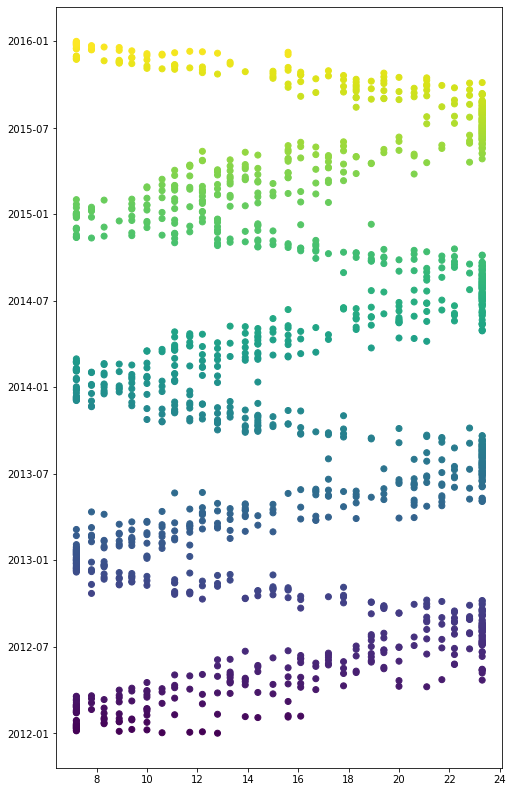

In [46]:
color = np.arange(0,1461)
plt.figure(figsize=(8,14))
plt.scatter(data=df,x='temp_max',y='date',c=color)#,cmap='inferno')
plt.show()

In [ ]:
Finding the Precipitation temperature by year(year)

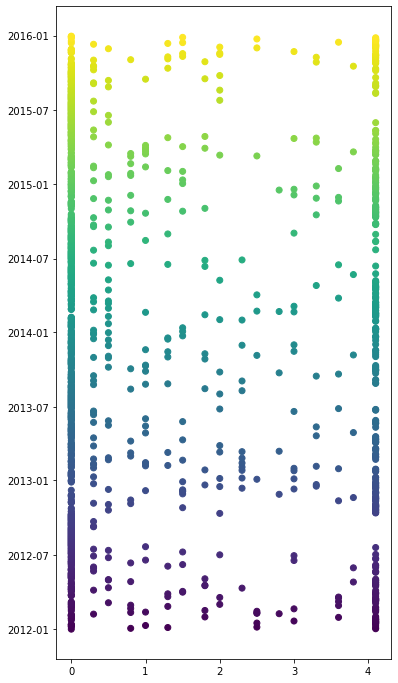

In [47]:
color = np.arange(0,1461)
plt.figure(figsize=(6,12))
plt.scatter(data=df,x='precipitation',y='date',c=color)#,cmap='plasma')
plt.show()

In [ ]:
Finding the Maximum weather by date(year)

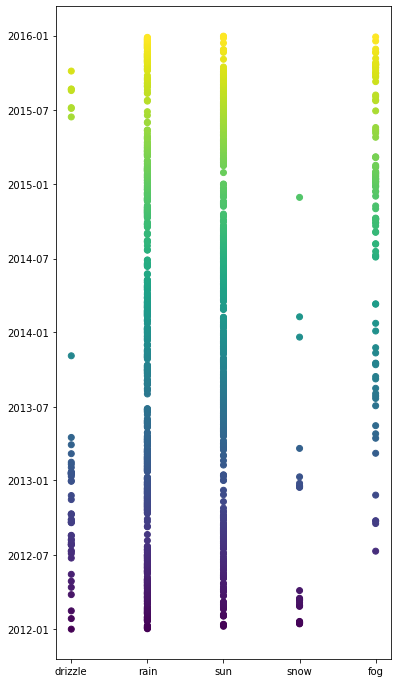

In [48]:
color = np.arange(0,1461)
plt.figure(figsize=(6,12))
plt.scatter(data=df,x='weather',y='date',c=color)#,cmap='plasma')
plt.show()

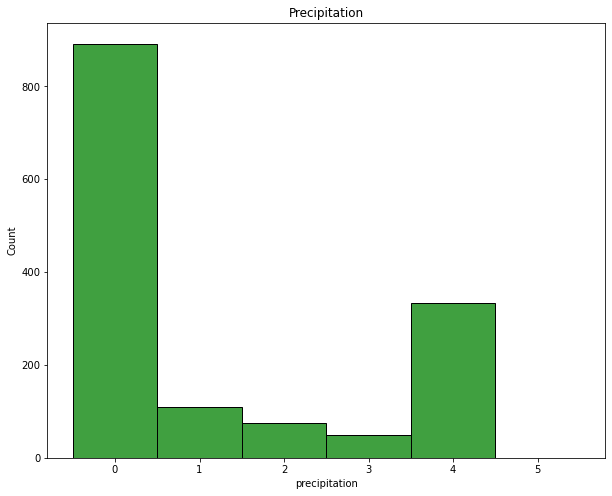

In [52]:
#precipitation
plt.figure(figsize=(10,8))
sns.histplot(df.precipitation,discrete=True,color='green')
plt.title('Precipitation')
plt.show()

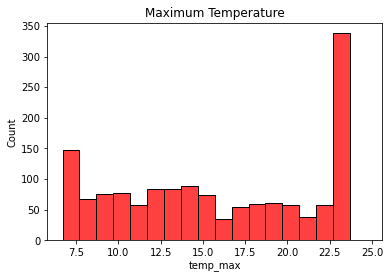

In [53]:
#max_temp
sns.histplot(df.temp_max, discrete=True,color='red')
plt.title('Maximum Temperature')
plt.show()

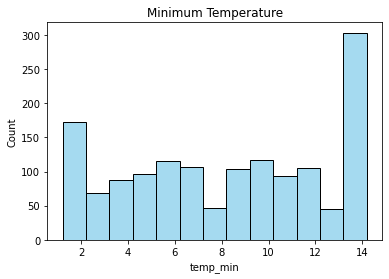

In [54]:
#min_temp
sns.histplot(df.temp_min, discrete=True,color='skyblue')
plt.title('Minimum Temperature')
plt.show()

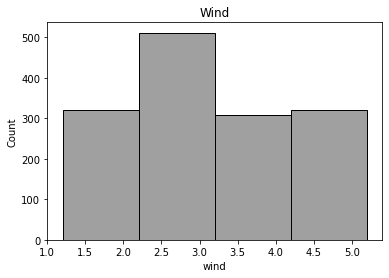

In [55]:
#wind
sns.histplot(df.wind, discrete=True,color='grey')
plt.title('Wind')
plt.show()

In [ ]:
subplot of all numeric coloumn

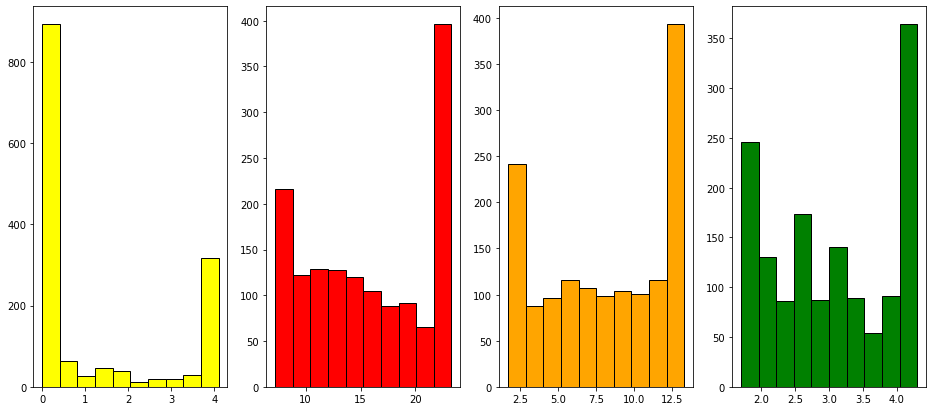

In [49]:
plt.figure(figsize=(16,7))
plt.subplot(1,4,1)
plt.hist(df['precipitation'],color='yellow',ec='black')


plt.subplot(1,4,2)
plt.hist(df['temp_max'],color='red',ec='black')


plt.subplot(1,4,3)
plt.hist(df['temp_min'],color='orange',ec='black')


plt.subplot(1,4,4)
plt.hist(df['wind'],color='green',ec='black')
plt.show()

In [ ]:
pairplot for numeric columns with seaborn

<Figure size 1008x576 with 0 Axes>

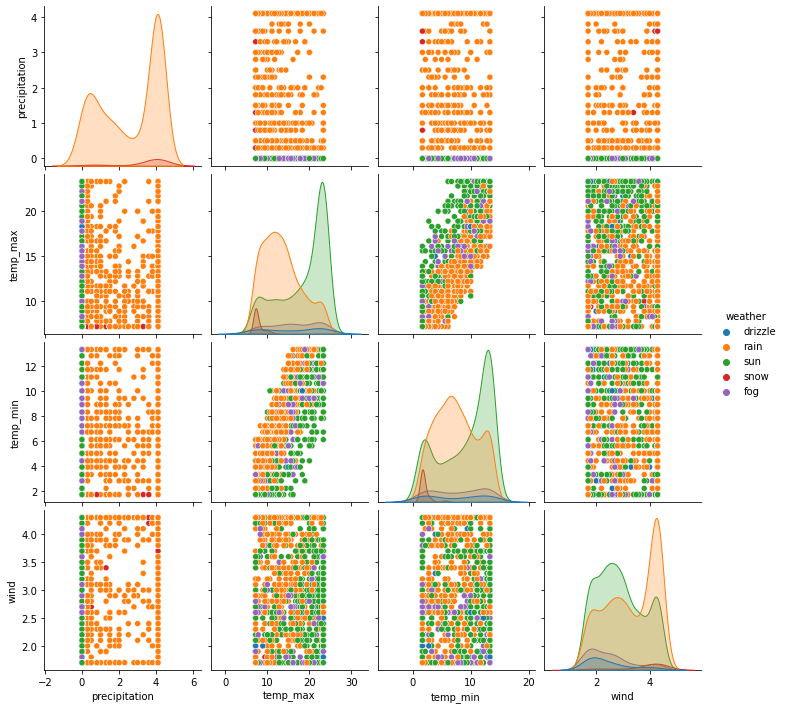

In [60]:
# sns.pairplot(df[['precipitation','temp_max','temp_min','wind']])
plt.figure(figsize=(14,8))
sns.pairplot(df.drop('date',axis=1),hue='weather')
plt.show()

In [ ]:
Plot between the maximum temp, minimum temp by precipitation

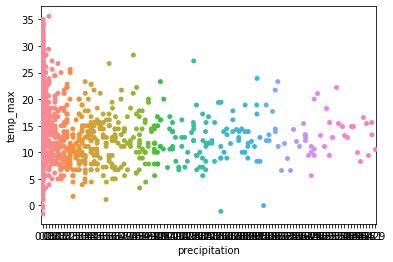

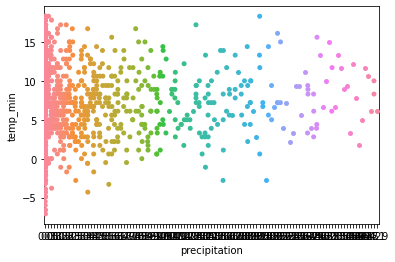

In [26]:
sns.stripplot(x='precipitation',y='temp_max',data=df)
plt.show()
sns.stripplot(x='precipitation',y='temp_min',data=df)
plt.show()

In [ ]:
FacetGrid helps in visualizing distribution of one variable 
as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels.

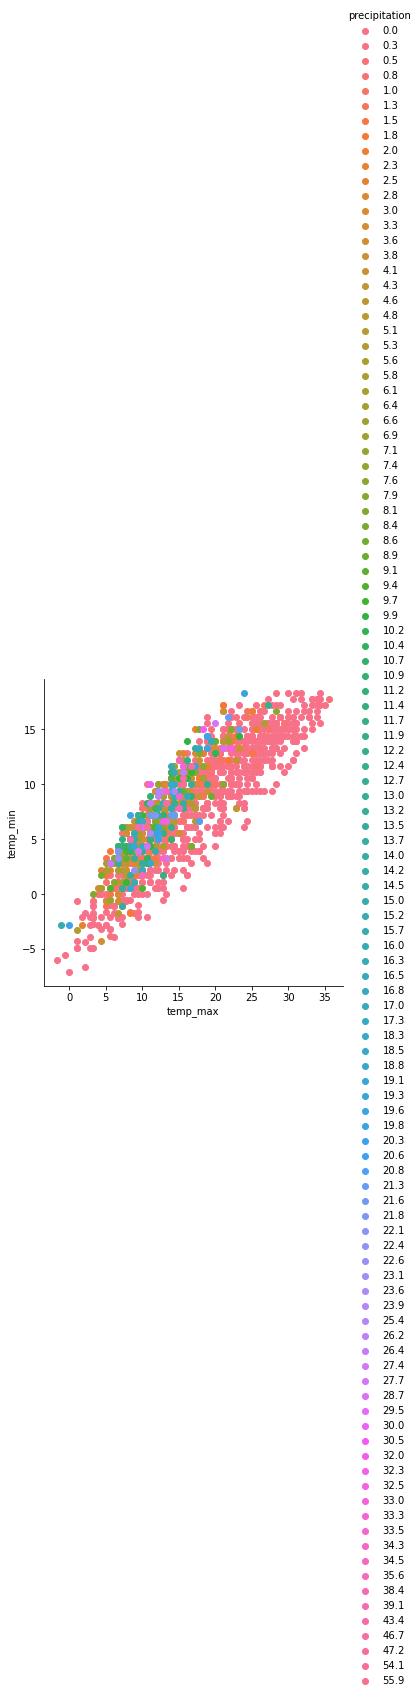

In [27]:
sns.FacetGrid(df, hue="precipitation", height=5) \
   .map(plt.scatter, "temp_max","temp_min") \
   .add_legend()

In [50]:
#correlation (relationship) between each column in the DataFrame
c=df.corr()
c

,precipitation,temp_max,temp_min,wind
precipitation,1.000000,-0.381236,-0.175422,0.327567
temp_max,-0.381236,1.000000,0.877862,-0.139603
temp_min,-0.175422,0.877862,1.000000,-0.051121
wind,0.327567,-0.139603,-0.051121,1.000000


******************** ############### ********************


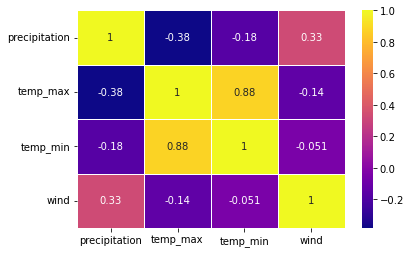

******************** ############### ********************


In [51]:
sns.heatmap(c,annot=True,linewidths=1,cmap='plasma')
print("*"*20,"#"*15,"*"*20)
plt.show()
print("*"*20,"#"*15,"*"*20)

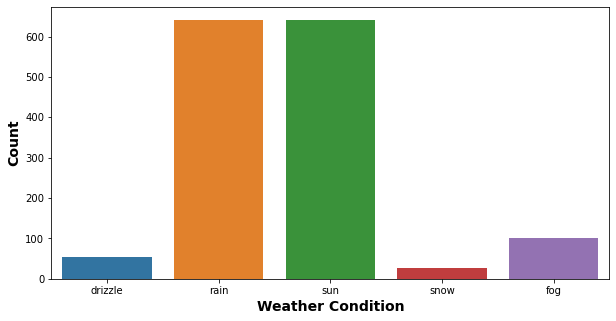

In [32]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'weather',data = df)
plt.xlabel("Weather Condition",fontweight='bold',size=14)
plt.ylabel("Count",fontweight='bold',size=14)
plt.show()

<AxesSubplot:>

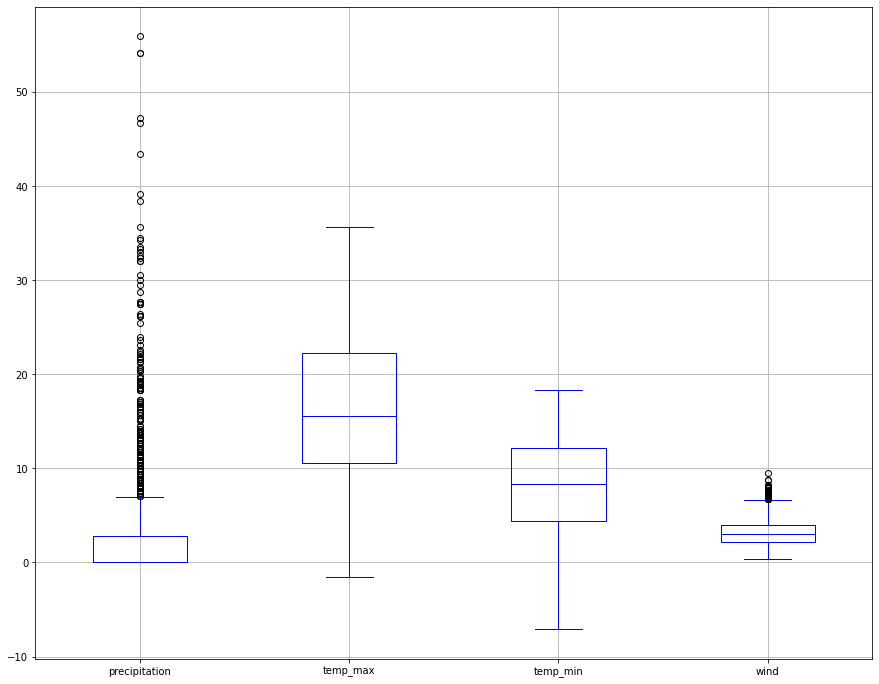

In [34]:
# Checking for the presence of outliers in numeric cols
#Outlier is an observation that appears far away and diverges from an overall pattern in a sample. Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results.
plt.figure(figsize=(15,12))
df.boxplot(column=['precipitation','temp_max','temp_min','wind'],color='blue')

In [39]:
#Finding values of outliers(IQR method)
#Checking for the presence of outliers in numeric cols
#Outlier is an observation that appears far away and diverges from an overall pattern in a sample. Outliers in input data can skew and mislead the training process of machine learning algorithms resulting in longer training times, less accurate models and ultimately poorer results.
def detect_outliers_iqr(data):
    outlier_list = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    #print("The Val of Q1 and Q2:",q1, q3)
    IQR = q3-q1
    print("IQR:",IQR)
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    print("The lower & Upper Bound:",lwr_bound, upr_bound)
    for i in data:
        if (i<lwr_bound or i>upr_bound):
            outlier_list.append(i)
    return outlier_list # Driver code
for i in ['precipitation','temp_max','temp_min','wind']:
    outliers = detect_outliers_iqr(df[i])
    print("Outliers in",i,"attribute :", outliers)
    print("-"*100)
    df.shape

IQR: 2.8
The lower & Upper Bound: -4.199999999999999 6.999999999999999
Outliers in precipitation attribute : [7.1, 7.1, 7.1, 7.4, 7.4, 7.4, 7.4, 7.6, 7.6, 7.6, 7.9, 7.9, 7.9, 7.9, 7.9, 7.9, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.1, 8.4, 8.4, 8.4, 8.4, 8.6, 8.6, 8.6, 8.6, 8.6, 8.6, 8.9, 8.9, 8.9, 8.9, 8.9, 9.1, 9.1, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.4, 9.7, 9.7, 9.7, 9.7, 9.7, 9.9, 9.9, 9.9, 9.9, 9.9, 10.2, 10.2, 10.4, 10.7, 10.7, 10.7, 10.9, 10.9, 10.9, 10.9, 10.9, 10.9, 11.2, 11.2, 11.4, 11.4, 11.7, 11.7, 11.7, 11.9, 11.9, 12.2, 12.2, 12.4, 12.7, 12.7, 12.7, 12.7, 12.7, 12.7, 13.0, 13.0, 13.0, 13.0, 13.2, 13.2, 13.5, 13.5, 13.5, 13.5, 13.5, 13.7, 13.7, 13.7, 13.7, 13.7, 13.7, 14.0, 14.0, 14.0, 14.2, 14.2, 14.5, 14.5, 15.0, 15.2, 15.2, 15.2, 15.2, 15.2, 15.7, 15.7, 16.0, 16.0, 16.0, 16.3, 16.5, 16.5, 16.5, 16.8, 17.0, 17.0, 17.0, 17.3, 17.3, 18.3, 18.3, 18.3, 18.3, 18.5, 18.5, 18.5, 18.5, 18.5, 18.8, 19.1, 19.3, 19.3, 19.3, 19.3, 19.6, 19.6, 19.8, 20.3, 20.3, 20.6, 20.6

In [57]:
def handle_outliers(df):
   tenth_percentile = np.percentile(df, 10)
   ninetieth_percentile = np.percentile(df, 80)
   b = np.where(df<tenth_percentile, tenth_percentile, df)
   b1 = np.where(b>ninetieth_percentile, ninetieth_percentile, b)
   return b1
for i in ['precipitation','temp_max','temp_min','wind']:
   df[i]=handle_outliers(df[i])

<AxesSubplot:>

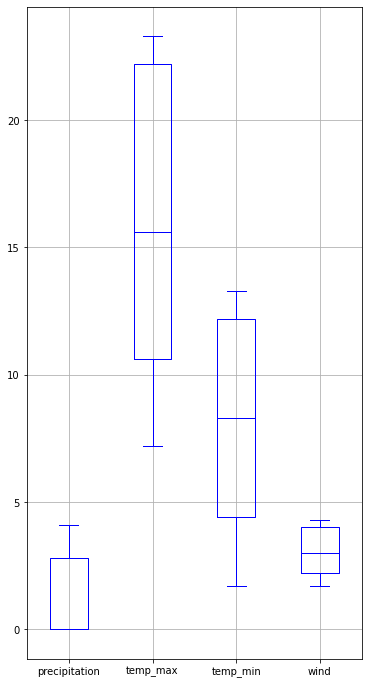

In [45]:
plt.figure(figsize=(6,12))
color = np.arange(0,1461)
df.boxplot(column=['precipitation','temp_max','temp_min','wind'],color='blue')

In [31]:
classes={ 
    
        'drizzle':0,
        'fog':1,
        'rain':2,
        'snow':3,
        'sun':4
}

In [32]:
dataset=df.drop('date', axis=1)

In [33]:
#astype('category'):the data type is simply changed to category and there is no pre-defined order of values in the list of categories
#.cat.code: extracts the numeric representation of the levels of a factor
dataset['weather']=dataset['weather'].astype('category')
dataset['weather']=dataset['weather'].cat.codes

In [34]:
x = dataset.drop('weather',axis=1)
y = dataset['weather']

In [35]:
x

,precipitation,temp_max,temp_min,wind
0,0.0,12.8,5.0,4.7
1,10.9,10.6,2.8,4.5
2,0.8,11.7,7.2,2.3
3,20.3,12.2,5.6,4.7
4,1.3,8.9,2.8,6.1
...,...,...,...,...
1456,8.6,4.4,1.7,2.9
1457,1.5,5.0,1.7,1.3
1458,0.0,7.2,0.6,2.6
1459,0.0,5.6,-1.0,3.4


In [36]:
y

0       0
1       2
2       2
3       2
4       2
       ..
1456    2
1457    2
1458    1
1459    4
1460    4
Name: weather, Length: 1461, dtype: int8

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.25, random_state =42)

In [38]:
x_train.dtypes

precipitation    float64
temp_max         float64
temp_min         float64
wind             float64
dtype: object

In [39]:
y_train.dtypes

dtype('int8')

In [40]:
print("-"*40)
print("Shape of x training data : ",x_train.shape)
print("Shape of y training data : ",y_train.shape)
print("-"*40)     
print("Shape of x testing data : ",x_test.shape)
print("Shape of y testing data : ",y_test.shape)
print("-"*40)

----------------------------------------
Shape of x training data :  (1095, 4)
Shape of y training data :  (1095,)
----------------------------------------
Shape of x testing data :  (366, 4)
Shape of y testing data :  (366,)
----------------------------------------


In [41]:
sc = StandardScaler()#Standardize features by removing the mean and scaling to unit variance.
x_train = sc.fit_transform(x_train)#combination of fit() and transform() api on same data set
x_test = sc.transform(x_test)#parameters generated from fit() method, applied upon model to generate transformed data set.

In [ ]:
Dealing this problem with Seven machine learning models.(Classification)

1.LogisticRegression

2.KNeighbors

3.SVC(Support Vector Classification)

4.Gaussian Naive Bayes (GaussianNB)

5.RandomForest

6.SGD(stochastic gradient descent)

7.Gradient Boosting

In [42]:
# model
from sklearn.linear_model import LogisticRegression
classifier_log=LogisticRegression(random_state=0)
classifier_log.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [43]:
#model
from sklearn.neighbors import KNeighborsClassifier
classifier_knn=KNeighborsClassifier(n_neighbors = 5)#n_neighbors:int,default=5 Number of neighbors to search for during :meth: kneighbors queries.
classifier_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [44]:
# model 
from sklearn.svm import SVC
classifier_svc=SVC(kernel = 'linear', random_state=42)#The linear regression model expects a continuous valued target and it's score is the coefficient of determination.
classifier_svc.fit(x_train, y_train)

SVC(kernel='linear', random_state=42)

In [45]:
# model
from sklearn.naive_bayes import GaussianNB
classifier_gnb=GaussianNB()
classifier_gnb.fit(x_train, y_train,sample_weight=None)

GaussianNB()

In [46]:
# model
from sklearn.ensemble import RandomForestClassifier
classifier_rfc=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier_rfc.fit(x_train, y_train,sample_weight=None)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [47]:
# model
from sklearn.linear_model import SGDClassifier
classifier_sgdc=SGDClassifier()#stochastic gradient descent (SGD):the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate)
classifier_sgdc.fit(x_train, y_train)

SGDClassifier()

In [48]:
# model
from sklearn.ensemble import GradientBoostingClassifier
classifier_gbc=GradientBoostingClassifier()
classifier_gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [49]:
classifier_list=[classifier_log,classifier_knn,classifier_svc,classifier_gnb,classifier_rfc,classifier_sgdc,classifier_gbc]

In [50]:
#After training the model, it is time to use it to do predictions on testing data. 
#Metrics are used to check the model performance on predicted values and actual values. 
def accuracy(x_test, y_test, classifier):
    print(f"\nclassifier\n{classifier}")
    y_pred=classifier.predict(x_test)
    correct=0
    total=len(y_pred)
    for i,j in zip(y_pred,y_test):
        if i==j:
            correct+=1
    acc=(correct/total)*100
    print("\n"+str(acc)+"\n"+"-"*30+"\n")
    print("\n"+"*"*50+"\n"+classification_report(y_test,y_pred)+"\n")
    cm=confusion_matrix(y_test,y_pred)
    print(f"Confusion Matrix\n{cm}\n")
    return acc

In [51]:
accuracy_list=[]
classifier_list_str=[]

In [52]:
for clf in classifier_list:
    acc=accuracy(x_test, y_test, clf)
    accuracy_list.append(acc)
    classifier_list_str.append(str(clf)[:6])    


classifier
LogisticRegression(random_state=0)

78.41530054644808
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.00      0.00      0.00        30
           2       0.89      0.84      0.87       161
           3       1.00      0.12      0.22         8
           4       0.70      0.96      0.81       156

    accuracy                           0.78       366
   macro avg       0.52      0.39      0.38       366
weighted avg       0.72      0.78      0.73       366


Confusion Matrix
[[  0   0   1   0  10]
 [  0   0   3   0  27]
 [  0   0 136   0  25]
 [  0   0   6   1   1]
 [  0   0   6   0 150]]


classifier
KNeighborsClassifier()

73.224043715847
------------------------------


**************************************************
              precision    recall  f1-score   support

           0       0.20      0.09  

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero

In [53]:
classifier_list_str

['Logist', 'KNeigh', 'SVC(ke', 'Gaussi', 'Random', 'SGDCla', 'Gradie']

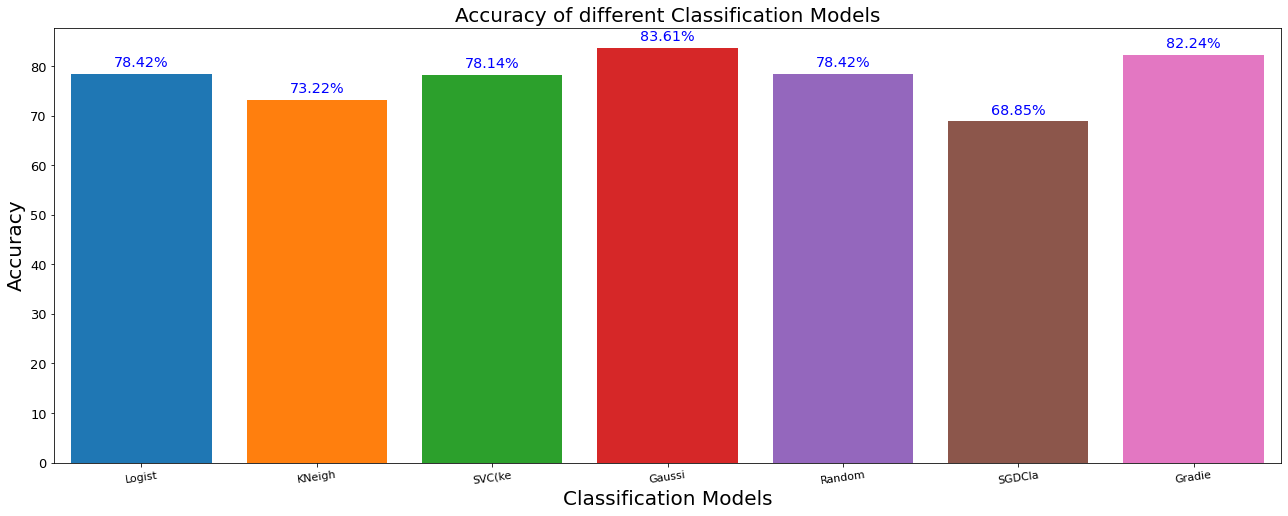

In [54]:
plt.figure(figsize=(22,8))
ax = sns.barplot(x=classifier_list_str, y=accuracy_list, saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20)
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height/100:.2%}',(x + width/2, y + height*1.02),ha='center', fontsize ='x-large',color='blue')
plt.show()

In [ ]:
We have predicted the Weather using Seven different ML model algorithms. 
The percentage of:-
1.LogisticRegression= 78.42%

2.KNeighbors= 73.22%

3.SVC(Support Vector Classification)= 78.14%

4.Gaussian Naive Bayes (GaussianNB)= 83.16%

5.RandomForest= 78.42%

6.SGD(stochastic gradient descent)= 68.85%

7.Gradient Boosting= 82.24%

In [56]:
Conclusion:-
    Out of seven machine learning algorithms we applied, 
    We conclude that Gaussian NB classifier performs the best on this dataset with 83.61% Accuracy